In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
import seaborn as sns
from keras.layers import Input,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers
print(tf.__version__)

2.1.0


Using TensorFlow backend.


Gold data from https://www.investing.com/currencies/xau-usd-historical-data

In [2]:
data = pd.read_csv('resources/XAU_USD Historical Data.csv')
data.head()

,Date,Price,Open,High,Low,Change %
0,"Nov 30, 2020","1,781.29","1,786.84","1,787.61","1,764.66",-0.31%
1,"Nov 29, 2020","1,786.84","1,787.25","1,789.99","1,785.56",-0.07%
2,"Nov 27, 2020","1,788.13","1,811.09","1,813.81","1,773.93",-1.24%
3,"Nov 26, 2020","1,810.57","1,805.74","1,818.78","1,805.31",0.29%
4,"Nov 25, 2020","1,805.30","1,807.69","1,817.98","1,801.33",-0.12%


In [3]:
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,Price,Open,High,Low,Change %
0,2020-11-30,"1,781.29","1,786.84","1,787.61","1,764.66",-0.31%
1,2020-11-29,"1,786.84","1,787.25","1,789.99","1,785.56",-0.07%
2,2020-11-27,"1,788.13","1,811.09","1,813.81","1,773.93",-1.24%
3,2020-11-26,"1,810.57","1,805.74","1,818.78","1,805.31",0.29%
4,2020-11-25,"1,805.30","1,807.69","1,817.98","1,801.33",-0.12%


Bitcoin data from https://www.investing.com/crypto/bitcoin/btc-usd-historical-data

In [4]:
BTC_data = pd.read_csv('resources/BTC_USD Bitfinex Historical Data.csv', usecols = ['Date','BTC_Price'])
BTC_data.head()

,Date,BTC_Price
0,30-Nov-20,"19,560.00"
1,29-Nov-20,"18,196.00"
2,28-Nov-20,"17,746.00"
3,27-Nov-20,"17,169.30"
4,26-Nov-20,"17,219.00"


In [5]:
BTC_data['Date'] = pd.to_datetime(BTC_data['Date'])
BTC_data.head()

,Date,BTC_Price
0,2020-11-30,"19,560.00"
1,2020-11-29,"18,196.00"
2,2020-11-28,"17,746.00"
3,2020-11-27,"17,169.30"
4,2020-11-26,"17,219.00"


S&P 500 (SPX) data from https://www.investing.com/indices/us-spx-500-historical-data

In [6]:
SP_data = pd.read_csv('resources/SP500Data.csv', usecols = ['Date','SP_Price'])
SP_data.head()

,Date,SP_Price
0,30-Nov-20,"3,621.63"
1,27-Nov-20,"3,638.35"
2,25-Nov-20,"3,629.65"
3,24-Nov-20,"3,635.41"
4,23-Nov-20,"3,577.59"


In [7]:
SP_data['Date'] = pd.to_datetime(SP_data['Date'])
SP_data.head()

,Date,SP_Price
0,2020-11-30,"3,621.63"
1,2020-11-27,"3,638.35"
2,2020-11-25,"3,629.65"
3,2020-11-24,"3,635.41"
4,2020-11-23,"3,577.59"


In [8]:
data = pd.merge(data, BTC_data, on='Date', how='left')
data 

,Date,Price,Open,High,Low,Change %,BTC_Price
0,2020-11-30,"1,781.29","1,786.84","1,787.61","1,764.66",-0.31%,"19,560.00"
1,2020-11-29,"1,786.84","1,787.25","1,789.99","1,785.56",-0.07%,"18,196.00"
2,2020-11-27,"1,788.13","1,811.09","1,813.81","1,773.93",-1.24%,"17,169.30"
3,2020-11-26,"1,810.57","1,805.74","1,818.78","1,805.31",0.29%,"17,219.00"
4,2020-11-25,"1,805.30","1,807.69","1,817.98","1,801.33",-0.12%,"18,730.00"
...,...,...,...,...,...,...,...
2838,2010-01-07,"1,132.30","1,138.20","1,139.15","1,128.60",-0.58%,NaN
2839,2010-01-06,"1,138.90","1,118.40","1,140.60","1,116.00",1.77%,NaN
2840,2010-01-05,"1,119.05","1,121.30","1,128.10","1,115.25",-0.12%,NaN
2841,2010-01-04,"1,120.40","1,096.25","1,123.80","1,093.45",2.10%,NaN


In [9]:
data = pd.merge(data, SP_data, on='Date', how='left')
data

,Date,Price,Open,High,Low,Change %,BTC_Price,SP_Price
0,2020-11-30,"1,781.29","1,786.84","1,787.61","1,764.66",-0.31%,"19,560.00","3,621.63"
1,2020-11-29,"1,786.84","1,787.25","1,789.99","1,785.56",-0.07%,"18,196.00",NaN
2,2020-11-27,"1,788.13","1,811.09","1,813.81","1,773.93",-1.24%,"17,169.30","3,638.35"
3,2020-11-26,"1,810.57","1,805.74","1,818.78","1,805.31",0.29%,"17,219.00",NaN
4,2020-11-25,"1,805.30","1,807.69","1,817.98","1,801.33",-0.12%,"18,730.00","3,629.65"
...,...,...,...,...,...,...,...,...
2838,2010-01-07,"1,132.30","1,138.20","1,139.15","1,128.60",-0.58%,NaN,"1,141.69"
2839,2010-01-06,"1,138.90","1,118.40","1,140.60","1,116.00",1.77%,NaN,"1,137.14"
2840,2010-01-05,"1,119.05","1,121.30","1,128.10","1,115.25",-0.12%,NaN,"1,136.52"
2841,2010-01-04,"1,120.40","1,096.25","1,123.80","1,093.45",2.10%,NaN,"1,132.99"


In [10]:
data = data.ffill(axis=0)
data

,Date,Price,Open,High,Low,Change %,BTC_Price,SP_Price
0,2020-11-30,"1,781.29","1,786.84","1,787.61","1,764.66",-0.31%,"19,560.00","3,621.63"
1,2020-11-29,"1,786.84","1,787.25","1,789.99","1,785.56",-0.07%,"18,196.00","3,621.63"
2,2020-11-27,"1,788.13","1,811.09","1,813.81","1,773.93",-1.24%,"17,169.30","3,638.35"
3,2020-11-26,"1,810.57","1,805.74","1,818.78","1,805.31",0.29%,"17,219.00","3,638.35"
4,2020-11-25,"1,805.30","1,807.69","1,817.98","1,801.33",-0.12%,"18,730.00","3,629.65"
...,...,...,...,...,...,...,...,...
2838,2010-01-07,"1,132.30","1,138.20","1,139.15","1,128.60",-0.58%,6.1,"1,141.69"
2839,2010-01-06,"1,138.90","1,118.40","1,140.60","1,116.00",1.77%,6.1,"1,137.14"
2840,2010-01-05,"1,119.05","1,121.30","1,128.10","1,115.25",-0.12%,6.1,"1,136.52"
2841,2010-01-04,"1,120.40","1,096.25","1,123.80","1,093.45",2.10%,6.1,"1,132.99"


In [11]:
data.dropna()

,Date,Price,Open,High,Low,Change %,BTC_Price,SP_Price
0,2020-11-30,"1,781.29","1,786.84","1,787.61","1,764.66",-0.31%,"19,560.00","3,621.63"
1,2020-11-29,"1,786.84","1,787.25","1,789.99","1,785.56",-0.07%,"18,196.00","3,621.63"
2,2020-11-27,"1,788.13","1,811.09","1,813.81","1,773.93",-1.24%,"17,169.30","3,638.35"
3,2020-11-26,"1,810.57","1,805.74","1,818.78","1,805.31",0.29%,"17,219.00","3,638.35"
4,2020-11-25,"1,805.30","1,807.69","1,817.98","1,801.33",-0.12%,"18,730.00","3,629.65"
...,...,...,...,...,...,...,...,...
2838,2010-01-07,"1,132.30","1,138.20","1,139.15","1,128.60",-0.58%,6.1,"1,141.69"
2839,2010-01-06,"1,138.90","1,118.40","1,140.60","1,116.00",1.77%,6.1,"1,137.14"
2840,2010-01-05,"1,119.05","1,121.30","1,128.10","1,115.25",-0.12%,6.1,"1,136.52"
2841,2010-01-04,"1,120.40","1,096.25","1,123.80","1,093.45",2.10%,6.1,"1,132.99"


In [12]:
data = data[::-1]
data

,Date,Price,Open,High,Low,Change %,BTC_Price,SP_Price
2842,2010-01-01,"1,097.35","1,097.25","1,097.90","1,097.05",0.10%,6.1,"1,132.99"
2841,2010-01-04,"1,120.40","1,096.25","1,123.80","1,093.45",2.10%,6.1,"1,132.99"
2840,2010-01-05,"1,119.05","1,121.30","1,128.10","1,115.25",-0.12%,6.1,"1,136.52"
2839,2010-01-06,"1,138.90","1,118.40","1,140.60","1,116.00",1.77%,6.1,"1,137.14"
2838,2010-01-07,"1,132.30","1,138.20","1,139.15","1,128.60",-0.58%,6.1,"1,141.69"
...,...,...,...,...,...,...,...,...
4,2020-11-25,"1,805.30","1,807.69","1,817.98","1,801.33",-0.12%,"18,730.00","3,629.65"
3,2020-11-26,"1,810.57","1,805.74","1,818.78","1,805.31",0.29%,"17,219.00","3,638.35"
2,2020-11-27,"1,788.13","1,811.09","1,813.81","1,773.93",-1.24%,"17,169.30","3,638.35"
1,2020-11-29,"1,786.84","1,787.25","1,789.99","1,785.56",-0.07%,"18,196.00","3,621.63"


In [13]:
data = data.reset_index(drop=True)
data

,Date,Price,Open,High,Low,Change %,BTC_Price,SP_Price
0,2010-01-01,"1,097.35","1,097.25","1,097.90","1,097.05",0.10%,6.1,"1,132.99"
1,2010-01-04,"1,120.40","1,096.25","1,123.80","1,093.45",2.10%,6.1,"1,132.99"
2,2010-01-05,"1,119.05","1,121.30","1,128.10","1,115.25",-0.12%,6.1,"1,136.52"
3,2010-01-06,"1,138.90","1,118.40","1,140.60","1,116.00",1.77%,6.1,"1,137.14"
4,2010-01-07,"1,132.30","1,138.20","1,139.15","1,128.60",-0.58%,6.1,"1,141.69"
...,...,...,...,...,...,...,...,...
2838,2020-11-25,"1,805.30","1,807.69","1,817.98","1,801.33",-0.12%,"18,730.00","3,629.65"
2839,2020-11-26,"1,810.57","1,805.74","1,818.78","1,805.31",0.29%,"17,219.00","3,638.35"
2840,2020-11-27,"1,788.13","1,811.09","1,813.81","1,773.93",-1.24%,"17,169.30","3,638.35"
2841,2020-11-29,"1,786.84","1,787.25","1,789.99","1,785.56",-0.07%,"18,196.00","3,621.63"


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2843 entries, 0 to 2842
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2843 non-null   datetime64[ns]
 1   Price      2843 non-null   object        
 2   Open       2843 non-null   object        
 3   High       2843 non-null   object        
 4   Low        2843 non-null   object        
 5   Change %   2843 non-null   object        
 6   BTC_Price  2843 non-null   object        
 7   SP_Price   2843 non-null   object        
dtypes: datetime64[ns](1), object(7)
memory usage: 177.8+ KB


In [15]:
data["Price"] = data["Price"].str.replace(",","").astype(float)
data["High"] = data["High"].str.replace(",","").astype(float)
data["Low"] = data["Low"].str.replace(",","").astype(float)
data["BTC_Price"] = data["BTC_Price"].str.replace(",","").astype(float)
data["SP_Price"] = data["SP_Price"].str.replace(",","").astype(float)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2843 entries, 0 to 2842
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2843 non-null   datetime64[ns]
 1   Price      2843 non-null   float64       
 2   Open       2843 non-null   object        
 3   High       2843 non-null   float64       
 4   Low        2843 non-null   float64       
 5   Change %   2843 non-null   object        
 6   BTC_Price  2843 non-null   float64       
 7   SP_Price   2843 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 177.8+ KB


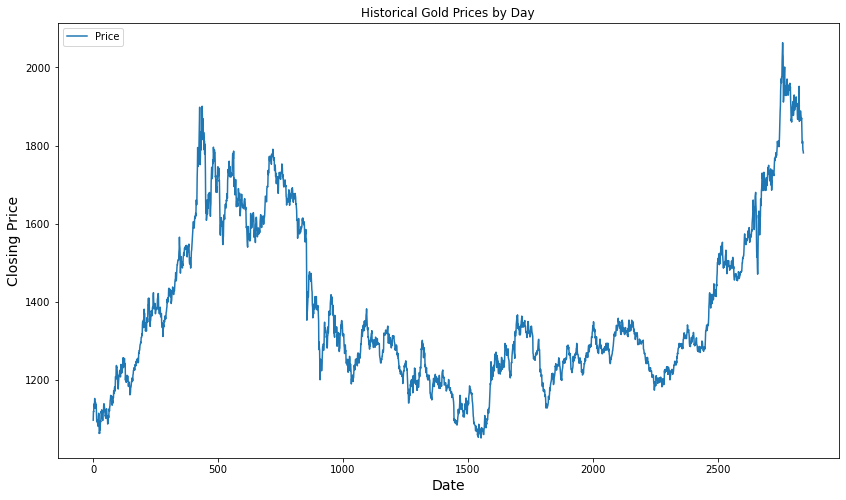

In [17]:
# plot close price vs. time to review completeness and shape of data

data.plot(y='Price', figsize=(14,8))
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)
plt.title('Historical Gold Prices by Day')
plt.show()

Skewness: %f 0.8779153188535712
Kurtosis: -0.144369


C:\Users\dave\anaconda3\envs\PythonAdv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


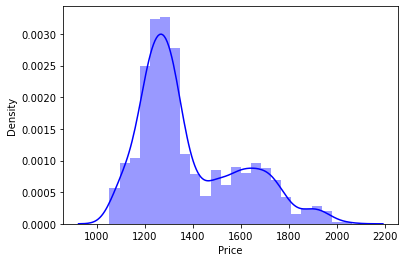

In [18]:
# check target variable

sns.distplot(data['Price'], color = 'blue')
print('Skewness: %f', data['Price'].skew())
print("Kurtosis: %f" % data['Price'].kurt())

In [19]:
data = data.drop(['Open', 'Change %'], axis=1)
data

,Date,Price,High,Low,BTC_Price,SP_Price
0,2010-01-01,1097.35,1097.90,1097.05,6.1,1132.99
1,2010-01-04,1120.40,1123.80,1093.45,6.1,1132.99
2,2010-01-05,1119.05,1128.10,1115.25,6.1,1136.52
3,2010-01-06,1138.90,1140.60,1116.00,6.1,1137.14
4,2010-01-07,1132.30,1139.15,1128.60,6.1,1141.69
...,...,...,...,...,...,...
2838,2020-11-25,1805.30,1817.98,1801.33,18730.0,3629.65
2839,2020-11-26,1810.57,1818.78,1805.31,17219.0,3638.35
2840,2020-11-27,1788.13,1813.81,1773.93,17169.3,3638.35
2841,2020-11-29,1786.84,1789.99,1785.56,18196.0,3621.63


In [20]:
data.to_csv(r'resources\Cleaned_10_Yr_Gold_Data.csv', index = False)

In [21]:
data.tail()

,Date,Price,High,Low,BTC_Price,SP_Price
2838,2020-11-25,1805.30,1817.98,1801.33,18730.0,3629.65
2839,2020-11-26,1810.57,1818.78,1805.31,17219.0,3638.35
2840,2020-11-27,1788.13,1813.81,1773.93,17169.3,3638.35
2841,2020-11-29,1786.84,1789.99,1785.56,18196.0,3621.63
2842,2020-11-30,1781.29,1787.61,1764.66,19560.0,3621.63


In [22]:
test = data.tail(100)
#test

In [23]:
High = test.High.values
Low = test.Low.values
Price = test.Price.values

In [24]:
X = []
y = []

for i in range(len(High)):
    row = []
    yrow = []
    row.append(High[i])
    row.append(Low[i])
#     row.append(Volume[i])
    yrow.append(Price[i])
    X.append(row)
    y.append(yrow)
X = np.array(X)
y = np.array(y)
#X

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

In [26]:
normalizer = preprocessing.Normalization()
normalizer.adapt(X_train)

In [27]:
price = np.array(X_train)
price2 = np.array(X_train)
price_normalizer = preprocessing.Normalization(input_shape=[1,])
price_normalizer.adapt(price)
price_normalizer2 = preprocessing.Normalization(input_shape=[1,])
price_normalizer2.adapt(price2)

In [28]:
price_model = tf.keras.Sequential([
#price_normalizer,
    layers.Dense(50, activation='relu', input_dim=2),
    layers.Dense(50, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(25, activation='relu'),
    layers.Dense(units=1)
])

In [29]:
price_model.predict(X_test[:10])

array([[-133.73424 ],
       [-124.49717 ],
       [-126.99096 ],
       [-129.75269 ],
       [-129.66765 ],
       [-128.2318  ],
       [-129.42921 ],
       [-126.622955],
       [-130.92801 ],
       [-118.73768 ]], dtype=float32)

In [30]:
price_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.0001),
    loss='mean_absolute_error', metrics=['accuracy'])

In [31]:
%%time
history = price_model.fit(
    X_train, y_train,
    epochs=300,
    # suppress logging
    verbose=2,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Train on 64 samples, validate on 16 samples
Epoch 1/300
64/64 - 0s - loss: 2034.7110 - accuracy: 0.0000e+00 - val_loss: 2012.2151 - val_accuracy: 0.0000e+00
Epoch 2/300
64/64 - 0s - loss: 2023.2379 - accuracy: 0.0000e+00 - val_loss: 2000.9652 - val_accuracy: 0.0000e+00
Epoch 3/300
64/64 - 0s - loss: 2011.9093 - accuracy: 0.0000e+00 - val_loss: 1989.8203 - val_accuracy: 0.0000e+00
Epoch 4/300
64/64 - 0s - loss: 2000.7000 - accuracy: 0.0000e+00 - val_loss: 1978.8384 - val_accuracy: 0.0000e+00
Epoch 5/300
64/64 - 0s - loss: 1989.6962 - accuracy: 0.0000e+00 - val_loss: 1968.2700 - val_accuracy: 0.0000e+00
Epoch 6/300
64/64 - 0s - loss: 1979.0513 - accuracy: 0.0000e+00 - val_loss: 1957.8475 - val_accuracy: 0.0000e+00
Epoch 7/300
64/64 - 0s - loss: 1968.5455 - accuracy: 0.0000e+00 - val_loss: 1947.3257 - val_accuracy: 0.0000e+00
Epoch 8/300
64/64 - 0s - loss: 1957.7899 - accuracy: 0.0000e+00 - val_loss: 1936.8015 - val_accuracy: 0.0000e+00
Epoch 9/300
64/64 - 0s - loss: 1947.4841 - accuracy:

Epoch 73/300
64/64 - 0s - loss: 1522.3338 - accuracy: 0.0000e+00 - val_loss: 1500.2784 - val_accuracy: 0.0000e+00
Epoch 74/300
64/64 - 0s - loss: 1504.4228 - accuracy: 0.0000e+00 - val_loss: 1482.2344 - val_accuracy: 0.0000e+00
Epoch 75/300
64/64 - 0s - loss: 1485.9563 - accuracy: 0.0000e+00 - val_loss: 1463.2880 - val_accuracy: 0.0000e+00
Epoch 76/300
64/64 - 0s - loss: 1466.5812 - accuracy: 0.0000e+00 - val_loss: 1443.3464 - val_accuracy: 0.0000e+00
Epoch 77/300
64/64 - 0s - loss: 1446.2332 - accuracy: 0.0000e+00 - val_loss: 1422.7280 - val_accuracy: 0.0000e+00
Epoch 78/300
64/64 - 0s - loss: 1425.3394 - accuracy: 0.0000e+00 - val_loss: 1401.5166 - val_accuracy: 0.0000e+00
Epoch 79/300
64/64 - 0s - loss: 1403.7317 - accuracy: 0.0000e+00 - val_loss: 1379.5437 - val_accuracy: 0.0000e+00
Epoch 80/300
64/64 - 0s - loss: 1381.3483 - accuracy: 0.0000e+00 - val_loss: 1356.8634 - val_accuracy: 0.0000e+00
Epoch 81/300
64/64 - 0s - loss: 1358.2653 - accuracy: 0.0000e+00 - val_loss: 1333.4161 -

Epoch 147/300
64/64 - 0s - loss: 9.4977 - accuracy: 0.0000e+00 - val_loss: 6.0947 - val_accuracy: 0.0000e+00
Epoch 148/300
64/64 - 0s - loss: 9.1777 - accuracy: 0.0000e+00 - val_loss: 6.9906 - val_accuracy: 0.0000e+00
Epoch 149/300
64/64 - 0s - loss: 9.4377 - accuracy: 0.0000e+00 - val_loss: 7.5546 - val_accuracy: 0.0000e+00
Epoch 150/300
64/64 - 0s - loss: 9.4347 - accuracy: 0.0000e+00 - val_loss: 7.0285 - val_accuracy: 0.0000e+00
Epoch 151/300
64/64 - 0s - loss: 9.3952 - accuracy: 0.0000e+00 - val_loss: 5.5448 - val_accuracy: 0.0000e+00
Epoch 152/300
64/64 - 0s - loss: 9.2356 - accuracy: 0.0000e+00 - val_loss: 5.1754 - val_accuracy: 0.0000e+00
Epoch 153/300
64/64 - 0s - loss: 9.3761 - accuracy: 0.0000e+00 - val_loss: 5.7756 - val_accuracy: 0.0000e+00
Epoch 154/300
64/64 - 0s - loss: 9.2233 - accuracy: 0.0000e+00 - val_loss: 6.2489 - val_accuracy: 0.0000e+00
Epoch 155/300
64/64 - 0s - loss: 9.2204 - accuracy: 0.0000e+00 - val_loss: 6.5694 - val_accuracy: 0.0000e+00
Epoch 156/300
64/64

Epoch 223/300
64/64 - 0s - loss: 9.1655 - accuracy: 0.0000e+00 - val_loss: 5.9877 - val_accuracy: 0.0000e+00
Epoch 224/300
64/64 - 0s - loss: 9.2265 - accuracy: 0.0000e+00 - val_loss: 6.2077 - val_accuracy: 0.0000e+00
Epoch 225/300
64/64 - 0s - loss: 9.1661 - accuracy: 0.0000e+00 - val_loss: 6.0128 - val_accuracy: 0.0000e+00
Epoch 226/300
64/64 - 0s - loss: 9.1692 - accuracy: 0.0000e+00 - val_loss: 5.9825 - val_accuracy: 0.0000e+00
Epoch 227/300
64/64 - 0s - loss: 9.1643 - accuracy: 0.0000e+00 - val_loss: 5.8606 - val_accuracy: 0.0000e+00
Epoch 228/300
64/64 - 0s - loss: 9.1658 - accuracy: 0.0000e+00 - val_loss: 5.9397 - val_accuracy: 0.0000e+00
Epoch 229/300
64/64 - 0s - loss: 9.2108 - accuracy: 0.0000e+00 - val_loss: 6.0307 - val_accuracy: 0.0000e+00
Epoch 230/300
64/64 - 0s - loss: 9.1554 - accuracy: 0.0000e+00 - val_loss: 6.5038 - val_accuracy: 0.0000e+00
Epoch 231/300
64/64 - 0s - loss: 9.1695 - accuracy: 0.0000e+00 - val_loss: 6.7663 - val_accuracy: 0.0000e+00
Epoch 232/300
64/64

Epoch 299/300
64/64 - 0s - loss: 9.1877 - accuracy: 0.0000e+00 - val_loss: 7.0833 - val_accuracy: 0.0000e+00
Epoch 300/300
64/64 - 0s - loss: 9.2064 - accuracy: 0.0000e+00 - val_loss: 6.6759 - val_accuracy: 0.0000e+00
Wall time: 9.28 s


In [32]:
price_model.save("gold")

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: gold\assets


In [33]:
from tensorflow import keras

loaded_model = keras.models.load_model("gold")

In [34]:
# run test inputs to test model
prediction = loaded_model.predict([[1800, 1825]])
print(prediction[0][0])

1806.2297


In [35]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail(10)

,loss,accuracy,val_loss,val_accuracy,epoch
290,9.181175,0.0,5.783760,0.0,290
291,9.178268,0.0,6.305122,0.0,291
292,9.167477,0.0,6.532692,0.0,292
293,9.322771,0.0,7.354240,0.0,293
294,9.242302,0.0,6.448227,0.0,294
295,9.135481,0.0,5.657188,0.0,295
296,9.214079,0.0,5.660851,0.0,296
297,9.179531,0.0,6.110039,0.0,297
298,9.187714,0.0,7.083321,0.0,298
299,9.206402,0.0,6.675919,0.0,299


In [36]:
predict = price_model.predict(X)
predict

array([[1807.4476],
       [1803.952 ],
       [1802.9077],
       [1812.2511],
       [1830.5161],
       [1857.8717],
       [1882.0824],
       [1894.2843],
       [1925.0842],
       [1949.2606],
       [1964.2994],
       [1956.8414],
       [1968.0372],
       [1972.9214],
       [1996.9601],
       [2034.9652],
       [2053.4897],
       [2047.7748],
       [2035.4318],
       [1976.806 ],
       [1912.7549],
       [1942.6981],
       [1948.5673],
       [1963.8527],
       [1998.1825],
       [1971.273 ],
       [1941.1322],
       [1936.079 ],
       [1944.5692],
       [1926.0084],
       [1931.7891],
       [1947.5743],
       [1951.5192],
       [1965.2272],
       [1978.4264],
       [1955.5529],
       [1937.302 ],
       [1929.7096],
       [1932.1066],
       [1925.0634],
       [1936.4921],
       [1954.1012],
       [1947.2404],
       [1950.1354],
       [1960.4447],
       [1961.7115],
       [1949.0957],
       [1950.2667],
       [1924.2201],
       [1907.681 ],


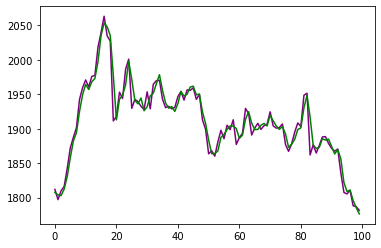

In [37]:
test_plt = test['Price'].reset_index().drop(columns='index')
plt.plot(test_plt, c='purple')
plt.plot(predict, c='g')


In [38]:
# convert predictions array above to a dataframe for future export to csv

predict_df = pd.DataFrame(predict, columns = ['Prediction'])
predict_df

,Prediction
0,1807.447632
1,1803.952026
2,1802.907715
3,1812.251099
4,1830.516113
...,...
95,1808.946411
96,1810.915405
97,1795.827515
98,1785.503052


In [39]:
predict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Prediction  100 non-null    float32
dtypes: float32(1)
memory usage: 528.0 bytes


In [40]:
last_100_df = data.iloc[-100:]
last_100_df

,Date,Price,High,Low,BTC_Price,SP_Price
2743,2020-07-15,1811.90,1814.79,1802.72,9210.1,3226.56
2744,2020-07-16,1797.05,1813.74,1795.02,9149.9,3215.57
2745,2020-07-17,1809.90,1812.03,1795.11,9167.3,3224.73
2746,2020-07-20,1816.09,1820.73,1805.60,9179.2,3251.84
2747,2020-07-21,1842.22,1843.89,1815.57,9402.0,3257.30
...,...,...,...,...,...,...
2838,2020-11-25,1805.30,1817.98,1801.33,18730.0,3629.65
2839,2020-11-26,1810.57,1818.78,1805.31,17219.0,3638.35
2840,2020-11-27,1788.13,1813.81,1773.93,17169.3,3638.35
2841,2020-11-29,1786.84,1789.99,1785.56,18196.0,3621.63


In [41]:
last_100_df = last_100_df.reset_index(drop=True)
last_100_df

,Date,Price,High,Low,BTC_Price,SP_Price
0,2020-07-15,1811.90,1814.79,1802.72,9210.1,3226.56
1,2020-07-16,1797.05,1813.74,1795.02,9149.9,3215.57
2,2020-07-17,1809.90,1812.03,1795.11,9167.3,3224.73
3,2020-07-20,1816.09,1820.73,1805.60,9179.2,3251.84
4,2020-07-21,1842.22,1843.89,1815.57,9402.0,3257.30
...,...,...,...,...,...,...
95,2020-11-25,1805.30,1817.98,1801.33,18730.0,3629.65
96,2020-11-26,1810.57,1818.78,1805.31,17219.0,3638.35
97,2020-11-27,1788.13,1813.81,1773.93,17169.3,3638.35
98,2020-11-29,1786.84,1789.99,1785.56,18196.0,3621.63


In [42]:
last_100_df = pd.concat([last_100_df, predict_df], axis=1)
last_100_df

,Date,Price,High,Low,BTC_Price,SP_Price,Prediction
0,2020-07-15,1811.90,1814.79,1802.72,9210.1,3226.56,1807.447632
1,2020-07-16,1797.05,1813.74,1795.02,9149.9,3215.57,1803.952026
2,2020-07-17,1809.90,1812.03,1795.11,9167.3,3224.73,1802.907715
3,2020-07-20,1816.09,1820.73,1805.60,9179.2,3251.84,1812.251099
4,2020-07-21,1842.22,1843.89,1815.57,9402.0,3257.30,1830.516113
...,...,...,...,...,...,...,...
95,2020-11-25,1805.30,1817.98,1801.33,18730.0,3629.65,1808.946411
96,2020-11-26,1810.57,1818.78,1805.31,17219.0,3638.35,1810.915405
97,2020-11-27,1788.13,1813.81,1773.93,17169.3,3638.35,1795.827515
98,2020-11-29,1786.84,1789.99,1785.56,18196.0,3621.63,1785.503052


In [43]:
last_100_df = last_100_df[['Date', 'Price', 'Prediction', 'Low', 'High']]
last_100_df

,Date,Price,Prediction,Low,High
0,2020-07-15,1811.90,1807.447632,1802.72,1814.79
1,2020-07-16,1797.05,1803.952026,1795.02,1813.74
2,2020-07-17,1809.90,1802.907715,1795.11,1812.03
3,2020-07-20,1816.09,1812.251099,1805.60,1820.73
4,2020-07-21,1842.22,1830.516113,1815.57,1843.89
...,...,...,...,...,...
95,2020-11-25,1805.30,1808.946411,1801.33,1817.98
96,2020-11-26,1810.57,1810.915405,1805.31,1818.78
97,2020-11-27,1788.13,1795.827515,1773.93,1813.81
98,2020-11-29,1786.84,1785.503052,1785.56,1789.99


In [44]:
last_30_df = last_100_df.iloc[-30:]
last_30_df

,Date,Price,Prediction,Low,High
70,2020-10-21,1924.49,1919.665771,1907.94,1931.41
71,2020-10-22,1904.04,1911.420776,1894.80,1926.00
72,2020-10-23,1900.79,1903.951294,1894.54,1914.30
73,2020-10-26,1901.69,1898.988159,1890.90,1908.55
74,2020-10-27,1906.83,1903.164062,1897.47,1911.34
75,2020-10-28,1877.06,1892.303467,1869.59,1911.03
76,2020-10-29,1867.13,1872.918213,1859.67,1885.42
77,2020-10-30,1877.95,1877.538940,1864.64,1889.85
78,2020-11-02,1895.10,1884.644409,1873.21,1896.12
79,2020-11-03,1908.36,1898.844116,1886.81,1910.71


In [45]:
last_30_df.to_csv(r'resources\30_Days_Gold_Predict.csv', index = False)